#### This file compares distances of vectors in P based on the Tau metric, contrasting between those obtained from sampling and from most distant.
#### This would be considered an auxiliary file, as it is exploratory and not directly concerned with the testbed

In [8]:
from sensitivity_tests import *
import pandas as pd

#A programmer's note to themselves. Beautiful
"""###rerun with tau comparison###"""

'###rerun with tau comparison###'

In [ ]:
#D matrix generators
eloTournament = SynthELOTournamentSource(50, 5, 80, 800)
smalleloTournament = SynthELOTournamentSource(4, 5, 80, 800)
l2dm = L2DifferenceMetric("max")
    
eloMatrix = eloTournament.init_D()
smalleloMatrix = smalleloTournament.init_D()

k, details = pyrankability.search.solve_pair_max_tau(eloMatrix)

print(l2dm._compute(k, [details["perm_x"],details["perm_y"]]))
k, details = pyrankability.search.solve_pair_max_tau(smalleloMatrix)

print(l2dm._compute(k, [details["perm_x"],details["perm_y"]]))

most_dist = []
sampled_dist = []

#Very straightforward. Generate tournament matricies, locate members of P with both methods, 
#and place in corresponding arrays.
for i in range(30):     
    eloMatrix = eloTournament.init_D()
    
    k, details = pyrankability.search.bilp(eloMatrix, num_random_restarts=10, find_pair=True)
    
    sampled_dist.append(l2dm._compute(k, details["P"]))
    
    k_most, details_most = pyrankability.search.solve_pair_max_tau(eloMatrix)
    
    most_dist.append(l2dm._compute(k_most, [details_most["perm_x"],details_most["perm_y"]]))
    
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")

[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

In [ ]:
sampled_dist

In [ ]:
most_dist

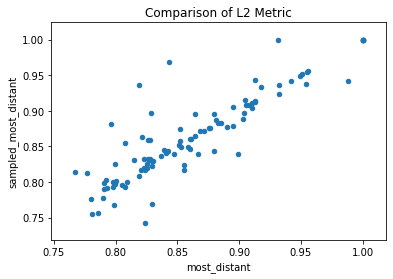

In [18]:
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")

In [ ]:
#ensuring data matches what is expected/presented
[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

In [ ]:
#ensuring data matches what is expected/presented
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(comp)
[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

In [ ]:
comp.to_csv(index=True)

In [ ]:
comp = pd.DataFrame(data={'most_distant': most_dist, 'sampled_most_distant': sampled_dist})
comp
comp.plot.scatter("most_distant", "sampled_most_distant", title="Comparison of L2 Metric")

[(most_dist[i]-sampled_dist[i]) for i in range(len(most_dist))]

In [ ]:
comp.to_csv(index=True)